In [1]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

In [2]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
    # 改变数据类型
y = y.astype(int)
    # 训练，测试数据分类
x_te, x_temp, y_te, y_temp = train_test_split(x, y, test_size=0.8, shuffle=True)
x_tr, x_va, y_tr, y_va = train_test_split(x_temp, y_temp, test_size=0.25, shuffle=True)

# print(x_val.shape,x_tr.shape,x_te.shape)

# 数据规范化
scaler = StandardScaler()
scaler.fit(x_tr)
trans_x_va = scaler.transform(x_va)
trans_x_tr = scaler.transform(x_tr)
trans_x_te = scaler.transform(x_te)

In [3]:
from datetime import datetime 

In [4]:
train_size = [500,1500,3000,5000,10000,20000,30000]

In [5]:
knn = KNeighborsClassifier(n_neighbors=10,algorithm = 'ball_tree') 
#‘kd_tree’,
knn1 = KNeighborsClassifier(n_neighbors=10,algorithm = 'kd_tree') 
#brute
knn2 = KNeighborsClassifier(n_neighbors=10,algorithm = 'brute') 
knn3 = KNeighborsClassifier(n_neighbors=10) 

clf_list = [knn,knn1,knn2,knn3]
pre_time = [[] for n in range(4)]

In [6]:
import random

In [7]:
for size in train_size:
    print(size)
    random_index = random.randint(0,trans_x_tr.shape[0] - size)
    for index in range(len(clf_list)):
        #fit the model
        clf_list[index].fit(trans_x_tr[random_index:random_index+size],y_tr[random_index:random_index+size])

        p = 5000
        #prediction time
        c=datetime.now()
        clf_list[index].predict(trans_x_te[0:p])
        d=datetime.now() 
        pre_time[index].append((d-c).microseconds/p)

500
1500
3000
5000
10000
20000
30000


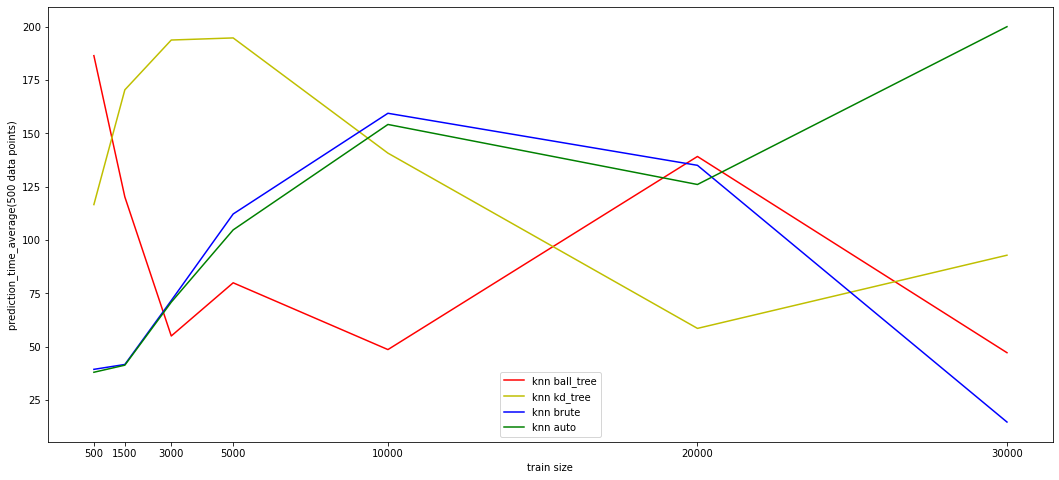

In [8]:
fig,axes = plt.subplots(figsize = (18,8))
axes.set_xlabel("train size")
axes.set_ylabel("prediction_time_average(500 data points)")
axes.plot(train_size,pre_time[0],"r-",label = "knn ball_tree")
axes.plot(train_size,pre_time[1],"y-",label = "knn kd_tree")
axes.plot(train_size,pre_time[2],"b-",label = "knn brute")
axes.plot(train_size,pre_time[3],"g-",label = "knn auto")
axes.set_xticks(train_size)
axes.legend()